## **<div align="center">(c) Logistic regression models for the probability of diverted US flights.**

## 2006

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
#importing the data required for (c)
airports = pd.read_csv(r"C:\Users\DELL\Documents\python codes\airports.csv")

In [4]:
cleaned_dataset = pd.read_csv(r"C:\Users\DELL\Documents\python codes\new_c_d.csv")

In [5]:
cleaned_dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,0,0,0,0,0,0,4.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,0,0,0,0,0,0,-5.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,0,0,0,0,0,0,-23.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,0,0,0,0,0,0,-10.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,0,0,0,0,0,0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595132,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,14,17,0,0,0,0,0,0,0,6.0
14595133,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,6,21,0,0,0,0,0,0,0,16.0
14595134,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,14,19,0,0,0,0,15,0,0,14.0
14595135,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,11,14,0,0,0,0,0,0,36,74.0


In [6]:
carriers = pd.read_csv(r"C:\Users\DELL\Documents\python codes\carriers.csv")

In [7]:
carriers

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1486,ZW,Air Wisconsin Airlines Corp
1487,ZX,Air Georgian
1488,ZX (1),Airbc Ltd.
1489,ZY,Atlantic Gulf Airlines


In [8]:
carriers = carriers.dropna()
carriers

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1486,ZW,Air Wisconsin Airlines Corp
1487,ZX,Air Georgian
1488,ZX (1),Airbc Ltd.
1489,ZY,Atlantic Gulf Airlines


In [9]:
airports

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [10]:
# Removing rows with missing values
airports = airports.dropna()
airports

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [11]:
# Creating new Data Frames with the required columns
cleaned = cleaned_dataset[['Diverted','Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','DepDelay',
                         'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','TaxiOut',
                         'Origin','Dest','Distance','UniqueCarrier']]
cleaned         

,Diverted,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TaxiOut,Origin,Dest,Distance,UniqueCarrier
0,0,2006,1,11,3,745,1018,-2.0,0,0,0,0,0,13,ATL,PHX,1587,US
1,0,2006,1,11,3,1053,1318,0.0,0,0,0,0,0,19,ATL,PHX,1587,US
2,0,2006,1,11,3,1915,2133,0.0,0,0,0,0,0,11,ATL,PHX,1587,US
3,0,2006,1,11,3,1755,1933,-2.0,0,0,0,0,0,10,AUS,PHX,872,US
4,0,2006,1,11,3,832,1015,-8.0,0,0,0,0,0,12,AUS,PHX,872,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595132,0,2007,12,15,6,1605,1736,-7.0,0,0,0,0,0,17,MCO,ATL,403,DL
14595133,0,2007,12,15,6,1851,2105,11.0,0,0,0,0,0,21,ATL,SLC,1589,DL
14595134,0,2007,12,15,6,1025,1735,-1.0,0,0,15,0,0,19,LAX,ATL,1946,DL
14595135,0,2007,12,15,6,1315,1622,38.0,0,0,0,0,36,14,DFW,ATL,732,DL


In [12]:
cleaned.to_csv('cleaned_c.csv', index=False) 

In [13]:
df_2006 = cleaned[cleaned['Year'] == 2006]
df_2006

,Diverted,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TaxiOut,Origin,Dest,Distance,UniqueCarrier
0,0,2006,1,11,3,745,1018,-2.0,0,0,0,0,0,13,ATL,PHX,1587,US
1,0,2006,1,11,3,1053,1318,0.0,0,0,0,0,0,19,ATL,PHX,1587,US
2,0,2006,1,11,3,1915,2133,0.0,0,0,0,0,0,11,ATL,PHX,1587,US
3,0,2006,1,11,3,1755,1933,-2.0,0,0,0,0,0,10,AUS,PHX,872,US
4,0,2006,1,11,3,832,1015,-8.0,0,0,0,0,0,12,AUS,PHX,872,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141917,0,2006,12,29,5,1249,1459,-3.0,0,0,0,0,0,12,ATL,EWR,745,DL
7141918,0,2006,12,29,5,1155,1931,30.0,30,0,32,0,0,35,SEA,ATL,2182,DL
7141919,0,2006,12,29,5,2115,2241,3.0,0,0,0,0,0,27,ATL,MCO,403,DL
7141920,0,2006,12,29,5,2127,2223,-5.0,0,0,0,0,0,21,SLC,SJC,585,DL


In [14]:
# Merging the "iata" column from airports with "Origin" in df_2006
data_origin = pd.merge(df_2006, airports, left_on='Origin', right_on='iata', how= 'left', suffixes=('_origin','_dest'))

In [15]:
# Merging the "iata" column from airports with "Dest" in data_origin
data_dest = pd.merge(data_origin, airports, left_on='Dest', right_on='iata', how= 'left', suffixes=('_origin','_dest'))

In [16]:
dataframe_1 = pd.merge(data_dest, carriers, left_on='UniqueCarrier', right_on='Code', how= 'left')

In [17]:
print(dataframe_1.columns)

Index(['Diverted', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime',
       'CRSArrTime', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'TaxiOut', 'Origin', 'Dest',
       'Distance', 'UniqueCarrier', 'iata_origin', 'airport_origin',
       'city_origin', 'state_origin', 'country_origin', 'lat_origin',
       'long_origin', 'iata_dest', 'airport_dest', 'city_dest', 'state_dest',
       'country_dest', 'lat_dest', 'long_dest', 'Code', 'Description'],
      dtype='object')


In [18]:
dataframe_1.drop(columns= ['Description'], inplace=True)

In [19]:
dataframe_1

,Diverted,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,...,lat_origin,long_origin,iata_dest,airport_dest,city_dest,state_dest,country_dest,lat_dest,long_dest,Code
0,0,2006,1,11,3,745,1018,-2.0,0,0,...,33.640444,-84.426944,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
1,0,2006,1,11,3,1053,1318,0.0,0,0,...,33.640444,-84.426944,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
2,0,2006,1,11,3,1915,2133,0.0,0,0,...,33.640444,-84.426944,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
3,0,2006,1,11,3,1755,1933,-2.0,0,0,...,30.194533,-97.669872,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
4,0,2006,1,11,3,832,1015,-8.0,0,0,...,30.194533,-97.669872,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141917,0,2006,12,29,5,1249,1459,-3.0,0,0,...,33.640444,-84.426944,EWR,Newark Intl,Newark,NJ,USA,40.692497,-74.168661,DL
7141918,0,2006,12,29,5,1155,1931,30.0,30,0,...,47.448982,-122.309313,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,DL
7141919,0,2006,12,29,5,2115,2241,3.0,0,0,...,33.640444,-84.426944,MCO,Orlando International,Orlando,FL,USA,28.428889,-81.316028,DL
7141920,0,2006,12,29,5,2127,2223,-5.0,0,0,...,40.788388,-111.977773,SJC,San Jose International,San Jose,CA,USA,37.361862,-121.929009,DL


In [20]:
# Checking the number of null values in 'DepDelay'

null_values = dataframe_1['DepDelay'].isnull().sum()
print("Number of null values in column '{}': {}".format('DepDelay', null_values))

Number of null values in column 'DepDelay': 121934


In [21]:
#Removing null values from 'DepDelay'
dataframe_1 = dataframe_1.dropna(subset=['DepDelay'])
dataframe_1

,Diverted,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,...,lat_origin,long_origin,iata_dest,airport_dest,city_dest,state_dest,country_dest,lat_dest,long_dest,Code
0,0,2006,1,11,3,745,1018,-2.0,0,0,...,33.640444,-84.426944,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
1,0,2006,1,11,3,1053,1318,0.0,0,0,...,33.640444,-84.426944,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
2,0,2006,1,11,3,1915,2133,0.0,0,0,...,33.640444,-84.426944,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
3,0,2006,1,11,3,1755,1933,-2.0,0,0,...,30.194533,-97.669872,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
4,0,2006,1,11,3,832,1015,-8.0,0,0,...,30.194533,-97.669872,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141917,0,2006,12,29,5,1249,1459,-3.0,0,0,...,33.640444,-84.426944,EWR,Newark Intl,Newark,NJ,USA,40.692497,-74.168661,DL
7141918,0,2006,12,29,5,1155,1931,30.0,30,0,...,47.448982,-122.309313,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,DL
7141919,0,2006,12,29,5,2115,2241,3.0,0,0,...,33.640444,-84.426944,MCO,Orlando International,Orlando,FL,USA,28.428889,-81.316028,DL
7141920,0,2006,12,29,5,2127,2223,-5.0,0,0,...,40.788388,-111.977773,SJC,San Jose International,San Jose,CA,USA,37.361862,-121.929009,DL


In [22]:
#Replacing null values in 'TaxiOut' with their mean
dataframe_1 = dataframe_1.copy()
dataframe_1['TaxiOut'].fillna(dataframe_1['TaxiOut'].mean(), inplace=True)

In [23]:
# Checking the number of 0s and 1s in 'Diverted' column
dataframe_1.Diverted.value_counts()

Diverted
0    7003802
1      16186
Name: count, dtype: int64

In [24]:
# Check for null values in the 'Diverted' column
null_values = dataframe_1['Diverted'].isnull().sum()

In [25]:
# Print the number of null values
print("Number of null values in the 'Diverted' column:", null_values)

Number of null values in the 'Diverted' column: 0


In [26]:
# Turning 'DepDelay' values to integers
dataframe_1['DepDelay'] = dataframe_1['DepDelay'].astype(int)

In [27]:
pd.isnull(dataframe_1).sum(axis=0)

Diverted                0
Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
CRSArrTime              0
DepDelay                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
TaxiOut                 0
Origin                  0
Dest                    0
Distance                0
UniqueCarrier           0
iata_origin          4692
airport_origin       4692
city_origin          4692
state_origin         4692
country_origin       4692
lat_origin           4692
long_origin          4692
iata_dest            4708
airport_dest         4708
city_dest            4708
state_dest           4708
country_dest         4708
lat_dest             4708
long_dest            4708
Code                    0
dtype: int64

In [28]:
# Dropping all remaining null values in dataframe_1
dataframe_1 = dataframe_1.dropna(axis=0)

In [29]:
pd.isnull(dataframe_1).sum(axis=0)

Diverted             0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
DepDelay             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
TaxiOut              0
Origin               0
Dest                 0
Distance             0
UniqueCarrier        0
iata_origin          0
airport_origin       0
city_origin          0
state_origin         0
country_origin       0
lat_origin           0
long_origin          0
iata_dest            0
airport_dest         0
city_dest            0
state_dest           0
country_dest         0
lat_dest             0
long_dest            0
Code                 0
dtype: int64

In [30]:
dataframe_1

,Diverted,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,...,lat_origin,long_origin,iata_dest,airport_dest,city_dest,state_dest,country_dest,lat_dest,long_dest,Code
0,0,2006,1,11,3,745,1018,-2,0,0,...,33.640444,-84.426944,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
1,0,2006,1,11,3,1053,1318,0,0,0,...,33.640444,-84.426944,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
2,0,2006,1,11,3,1915,2133,0,0,0,...,33.640444,-84.426944,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
3,0,2006,1,11,3,1755,1933,-2,0,0,...,30.194533,-97.669872,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
4,0,2006,1,11,3,832,1015,-8,0,0,...,30.194533,-97.669872,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141917,0,2006,12,29,5,1249,1459,-3,0,0,...,33.640444,-84.426944,EWR,Newark Intl,Newark,NJ,USA,40.692497,-74.168661,DL
7141918,0,2006,12,29,5,1155,1931,30,30,0,...,47.448982,-122.309313,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,DL
7141919,0,2006,12,29,5,2115,2241,3,0,0,...,33.640444,-84.426944,MCO,Orlando International,Orlando,FL,USA,28.428889,-81.316028,DL
7141920,0,2006,12,29,5,2127,2223,-5,0,0,...,40.788388,-111.977773,SJC,San Jose International,San Jose,CA,USA,37.361862,-121.929009,DL


In [ ]:
dataframe_1.to_csv('dataframe_1.csv', index=False)

In [33]:
# Splitting the dataset into features (X_2006) and target variable (y_2006)

X_2006 = dataframe_1.drop(['Diverted'], axis=1)
y_2006 = dataframe_1['Diverted']

In [34]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split
X_2006_train, X_2006_test, y_2006_train, y_2006_test = train_test_split(X_2006, y_2006, test_size=0.2, random_state=42)

In [35]:
# Viewing the shape of x_train and x_test
X_2006_train.shape, X_2006_test.shape

((5608470, 32), (1402118, 32))

In [36]:
#Checking training set to see whether the 'Diverted' column has balanced data in terms of number of 0s and 1s.
y_2006_train.value_counts()

Diverted
0    5595505
1      12965
Name: count, dtype: int64

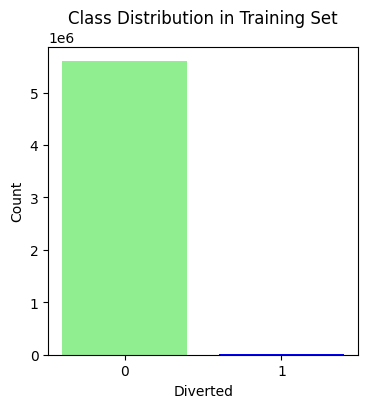

In [37]:
# Using a bar plot to visualise the imbalance of the training set
class_counts = y_2006_train.value_counts()

plt.figure(figsize=(4,4))
plt.bar(class_counts.index, class_counts.values, color=['lightgreen', 'blue'])
plt.xlabel('Diverted')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')
plt.xticks(class_counts.index, ['0', '1'])  
plt.show()

In [38]:
train_set = pd.concat([X_2006_train, y_2006_train], axis=1)

In [39]:
# Dividing the dataset into majority and minority classes to perform class balancing
data_majority_2006 = train_set[train_set['Diverted'] == 0]
data_minority_2006 = train_set[train_set['Diverted'] == 1]

In [40]:
# Downsampling the majority class
from sklearn.utils import resample
data_majority2006_downsampled = resample(data_majority_2006,
                                         replace = False,  # sampling without replacement
                                         n_samples=int(5595505 * 0.0075),   # to match minority class
                                         random_state=0)

In [41]:
# Upsampling the minority class
data_minority2006_upsampled = resample(data_minority_2006, 
                                 replace=True,     # sampling with replacement
                                 n_samples=int(12965 * 20),    # to match majority class
                                 random_state=0)

In [42]:
# Combining the sampled majority and minority classes to create a balanced dataset
train_set2006 = pd.concat([data_majority2006_downsampled, data_minority2006_upsampled])

In [43]:
# Displaying new class count in the training set
train_set2006.Diverted.value_counts()

Diverted
1    259300
0     41966
Name: count, dtype: int64

In [44]:
train_set2006

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,NASDelay,...,long_origin,iata_dest,airport_dest,city_dest,state_dest,country_dest,lat_dest,long_dest,Code,Diverted
897548,2006,2,20,1,825,935,-2,0,0,0,...,-120.642393,LAX,Los Angeles International,Los Angeles,CA,USA,33.942536,-118.408074,MQ,0
6047647,2006,11,8,3,1210,1350,-5,0,0,0,...,-94.306811,IAH,George Bush Intercontinental,Houston,TX,USA,29.980472,-95.339722,XE,0
1876842,2006,4,28,5,1232,1359,-2,0,0,0,...,-78.787472,CVG,Cincinnati Northern Kentucky Intl,Covington,KY,USA,39.046143,-84.662172,OH,0
7141211,2006,12,29,5,1730,2056,36,0,0,4,...,-73.778926,LAS,McCarran International,Las Vegas,NV,USA,36.080361,-115.152333,DL,0
250911,2006,1,28,6,1128,1302,-2,0,0,0,...,-104.667002,OAK,Metropolitan Oakland International,Oakland,CA,USA,37.721291,-122.220717,UA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733046,2006,5,31,3,1517,1715,-4,0,0,0,...,-93.216922,BNA,Nashville International,Nashville,TN,USA,36.124477,-86.678182,NW,1
1640849,2006,3,15,3,810,1200,-9,0,0,0,...,-71.005179,OAK,Metropolitan Oakland International,Oakland,CA,USA,37.721291,-122.220717,B6,1
6406447,2006,11,29,3,1525,1750,67,0,0,0,...,-76.668198,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,AA,1
4533961,2006,8,8,2,1349,1350,-5,0,0,0,...,-80.232871,MIA,Miami International,Miami,FL,USA,25.793250,-80.290556,MQ,1


In [45]:
train_set2006.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'TaxiOut', 'Origin', 'Dest', 'Distance',
       'UniqueCarrier', 'iata_origin', 'airport_origin', 'city_origin',
       'state_origin', 'country_origin', 'lat_origin', 'long_origin',
       'iata_dest', 'airport_dest', 'city_dest', 'state_dest', 'country_dest',
       'lat_dest', 'long_dest', 'Code', 'Diverted'],
      dtype='object')

In [46]:
train_set2006.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
CRSDepTime             int64
CRSArrTime             int64
DepDelay               int32
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
TaxiOut                int64
Origin                object
Dest                  object
Distance               int64
UniqueCarrier         object
iata_origin           object
airport_origin        object
city_origin           object
state_origin          object
country_origin        object
lat_origin           float64
long_origin          float64
iata_dest             object
airport_dest          object
city_dest             object
state_dest            object
country_dest          object
lat_dest             float64
long_dest            float64
Code                  object
Diverted               int64
dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
#Defining the categorical columns 
cat_cols = ['UniqueCarrier','Origin','Dest','state_origin','state_dest','city_origin','city_dest']

In [49]:
# Encoding the categorical variables into integer labels
label_encoder = LabelEncoder()
for col in cat_cols:
    train_set2006[col] = label_encoder.fit_transform(train_set2006[col])

In [50]:
#Selecting the categorical columns from the dataset
df2006_cat = train_set2006[cat_cols]

In [51]:
df2006_cat.dtypes

UniqueCarrier    int32
Origin           int32
Dest             int32
state_origin     int32
state_dest       int32
city_origin      int32
city_dest        int32
dtype: object

In [52]:
#Selecting the required numerical columns 
num_cols = ['Diverted','Month','DayofMonth','DayOfWeek','CRSDepTime', 'CRSArrTime','DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 
            'SecurityDelay','LateAircraftDelay','TaxiOut', 'Distance','lat_origin', 'long_origin','lat_dest', 'long_dest']

In [53]:
df2006_num = pd.DataFrame(train_set2006, columns=num_cols)

In [54]:
df2006_num

,Diverted,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TaxiOut,Distance,lat_origin,long_origin,lat_dest,long_dest
897548,0,2,20,1,825,935,-2,0,0,0,0,0,12,155,35.237058,-120.642393,33.942536,-118.408074
6047647,0,11,8,3,1210,1350,-5,0,0,0,0,0,11,438,36.281869,-94.306811,29.980472,-95.339722
1876842,0,4,28,5,1232,1359,-2,0,0,0,0,0,26,390,35.877639,-78.787472,39.046143,-84.662172
7141211,0,12,29,5,1730,2056,36,0,0,4,0,13,59,2248,40.639751,-73.778926,36.080361,-115.152333
250911,0,1,28,6,1128,1302,-2,0,0,0,0,0,14,957,39.858408,-104.667002,37.721291,-122.220717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733046,1,5,31,3,1517,1715,-4,0,0,0,0,0,12,695,44.880547,-93.216922,36.124477,-86.678182
1640849,1,3,15,3,810,1200,-9,0,0,0,0,0,33,2693,42.364348,-71.005179,37.721291,-122.220717
6406447,1,11,29,3,1525,1750,67,0,0,0,0,0,14,1217,39.175402,-76.668198,32.895951,-97.037200
4533961,1,8,8,2,1349,1350,-5,0,0,0,0,0,15,1013,40.491466,-80.232871,25.793250,-80.290556


In [55]:
#Resetting indices of both DataFrames
df2006_num.reset_index(drop=True, inplace=True)
df2006_cat.reset_index(drop=True, inplace=True)

In [56]:
# Combining the encoded categorical variables and numerical variables to create a new encoded dataframe 
df2006_new = pd.concat([df2006_num, df2006_cat], axis=1)

In [57]:
df2006_new

,Diverted,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,NASDelay,...,long_origin,lat_dest,long_dest,UniqueCarrier,Origin,Dest,state_origin,state_dest,city_origin,city_dest
0,0,2,20,1,825,935,-2,0,0,0,...,-120.642393,33.942536,-118.408074,10,234,150,4,4,227,154
1,0,11,8,3,1210,1350,-5,0,0,0,...,-94.306811,29.980472,-95.339722,18,276,129,2,43,88,115
2,0,4,28,5,1232,1359,-2,0,0,0,...,-78.787472,39.046143,-84.662172,12,221,70,26,16,209,65
3,0,12,29,5,1730,2056,36,0,0,4,...,-73.778926,36.080361,-115.152333,5,143,148,33,32,184,144
4,0,1,28,6,1128,1302,-2,0,0,0,...,-104.667002,37.721291,-122.220717,15,77,194,5,4,71,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301261,1,5,31,3,1517,1715,-4,0,0,0,...,-93.216922,36.124477,-86.678182,11,188,34,22,42,168,183
301262,1,3,15,3,810,1200,-9,0,0,0,...,-71.005179,37.721291,-122.220717,3,36,194,18,4,33,192
301263,1,11,29,3,1525,1750,67,0,0,0,...,-76.668198,32.895951,-97.037200,0,47,79,19,43,20,68
301264,1,8,8,2,1349,1350,-5,0,0,0,...,-80.232871,25.793250,-80.290556,10,210,179,37,8,204,166


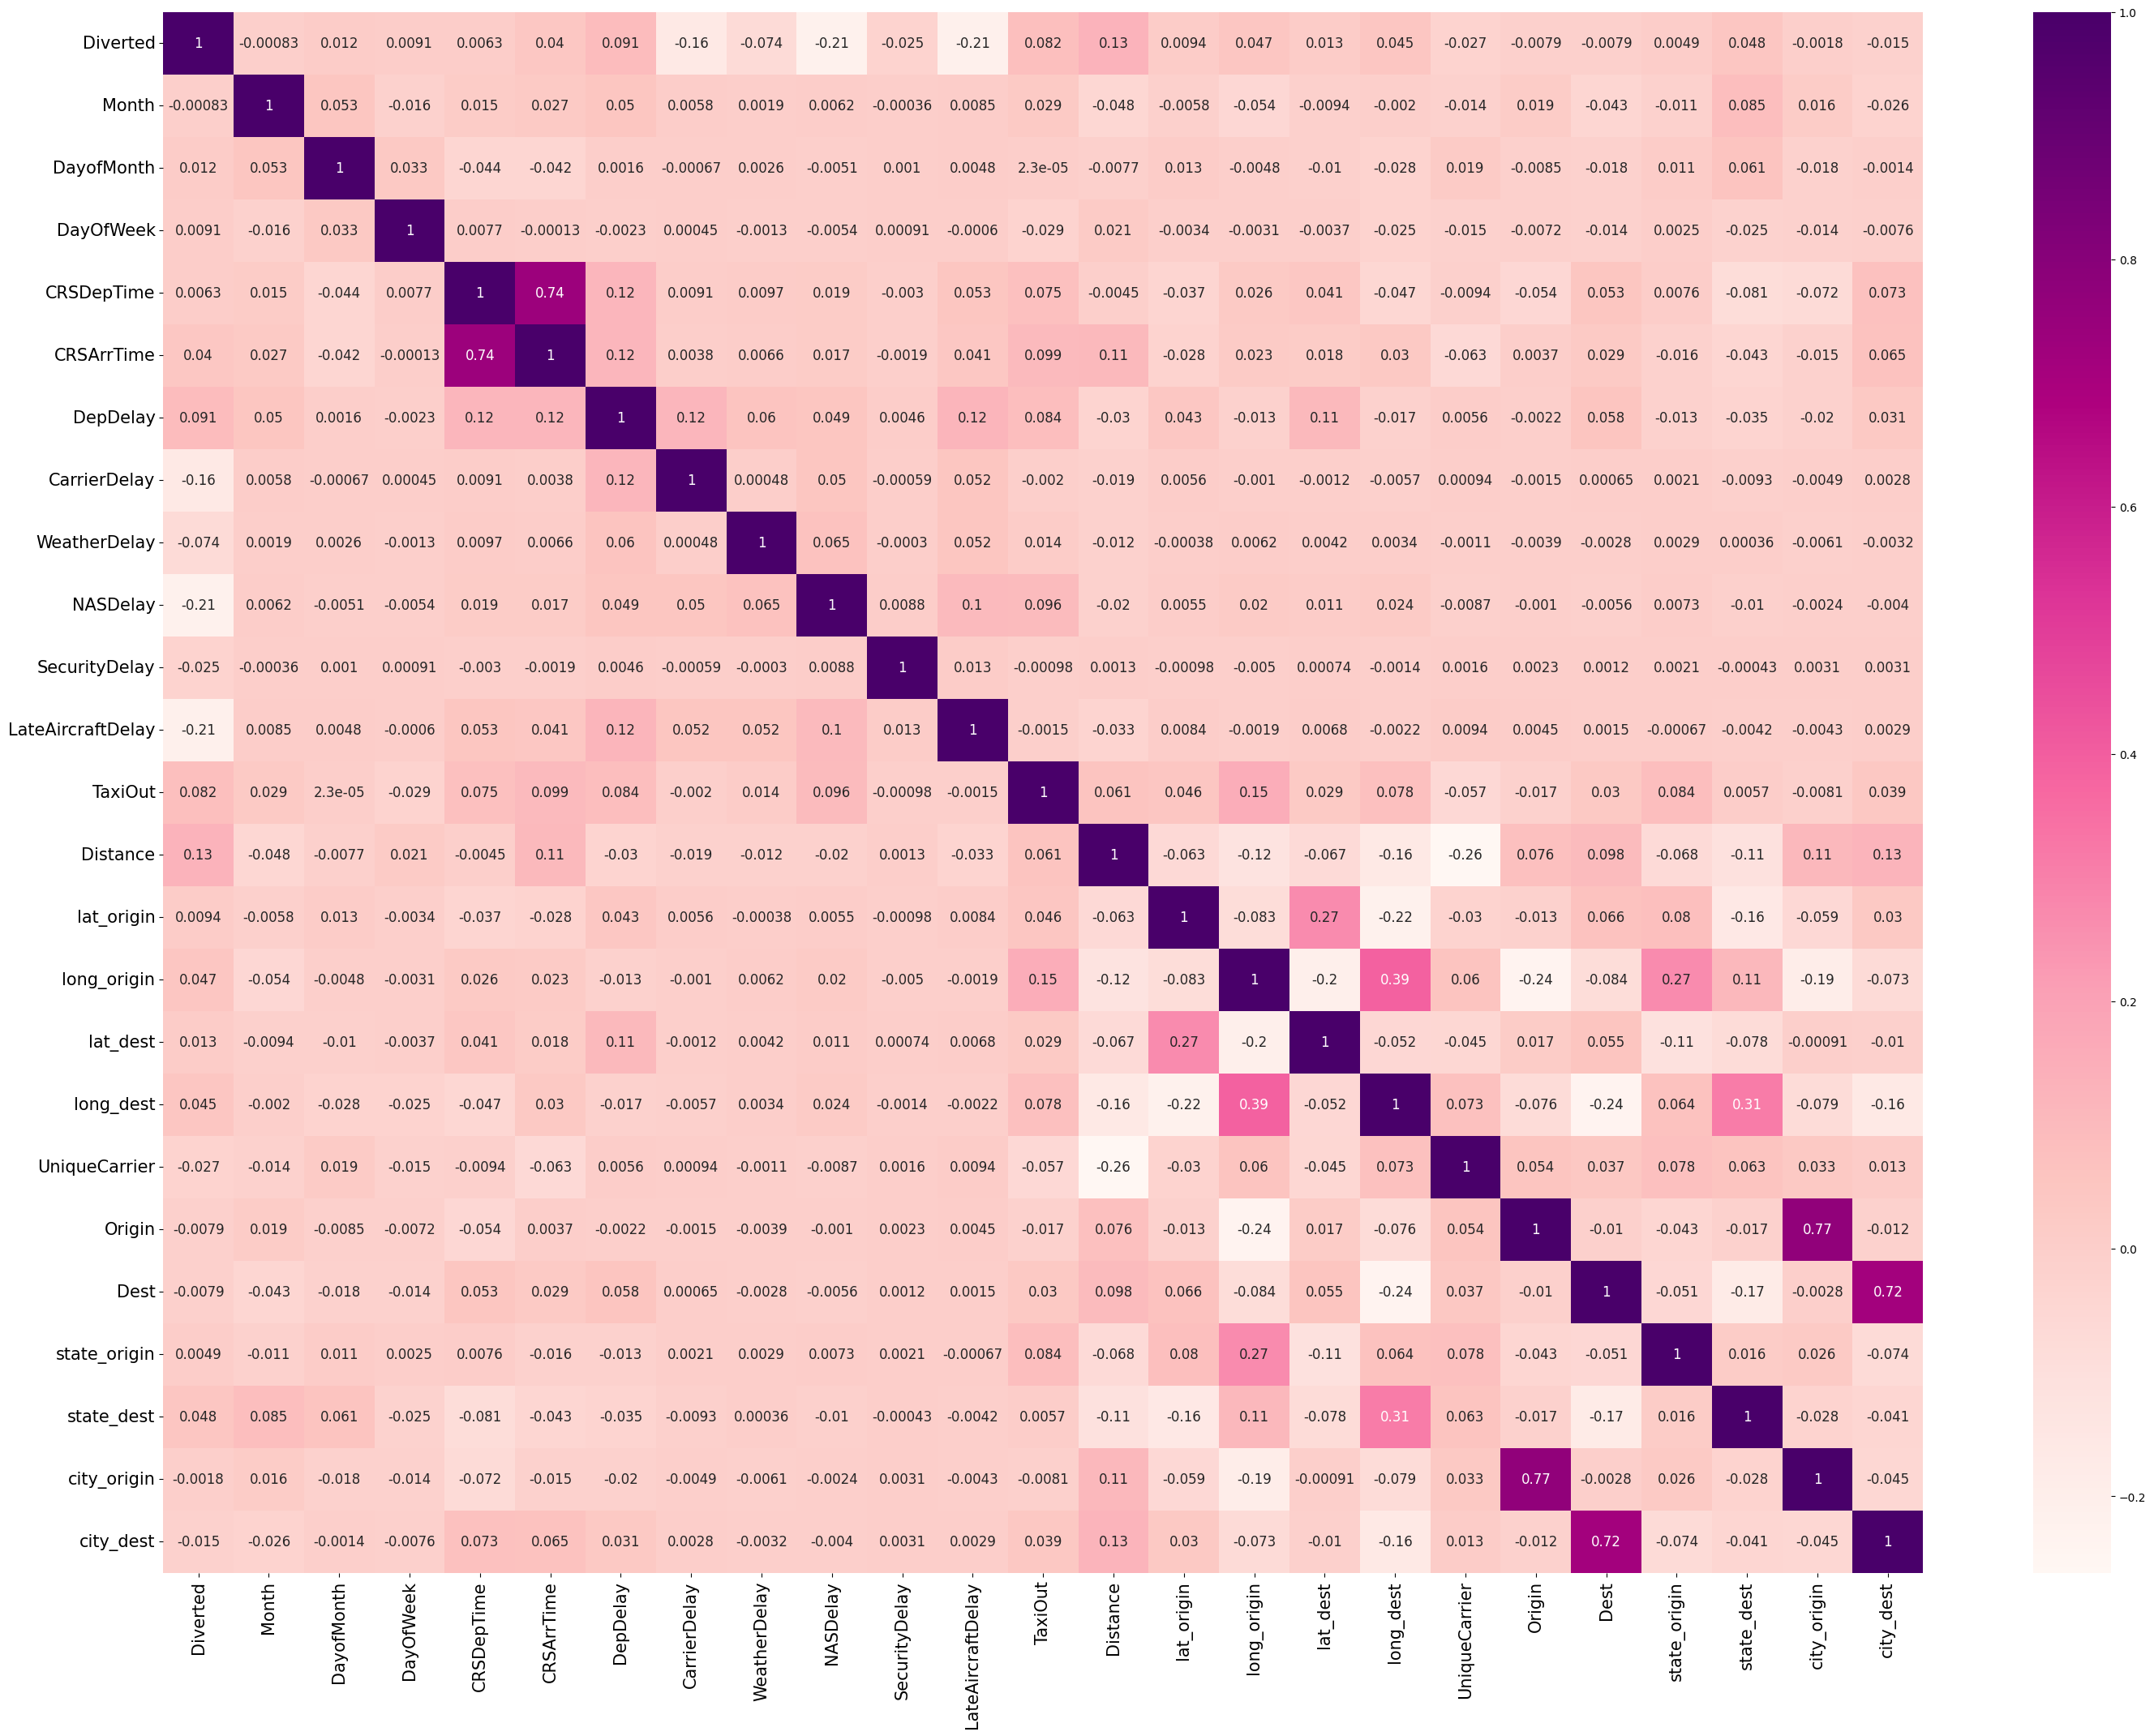

In [102]:
# Creating a heatmap to visualise the correlation/relationship between the columns in 2006

import matplotlib.pyplot as plt
import seaborn as sns

corr = df2006_new.corr()
plt.figure(figsize=(35, 25))
heatmap = sns.heatmap(corr, cmap="RdPu", annot=True, annot_kws={"fontsize": 12})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15, rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)
plt.show()

In [59]:
train_set2006.Diverted.value_counts()

Diverted
1    259300
0     41966
Name: count, dtype: int64

In [60]:
# Checking the number of 0s and 1s in the 'Diverted' column of the new encoded dataset
df2006_new.Diverted.value_counts()

Diverted
1    259300
0     41966
Name: count, dtype: int64

In [61]:
#Making the new x_train and y_train

X1_2006 = df2006_new.drop(['Diverted'],axis=1)
y1_2006 = df2006_new['Diverted']

In [62]:
# Splitting into new train and test data
X1_2006_train, X1_2006_test, y1_2006_train, y1_2006_test = train_test_split(X1_2006, y1_2006, test_size=0.2, random_state=42)

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
# Fitting the standard scaler on the encoded training data
std_scaler = MinMaxScaler()
X_train_scaled2006 = std_scaler.fit_transform(X1_2006_train)

In [106]:
# Fitting the standard scaler on the encoded testing data
std_scaler = MinMaxScaler()
X_test_scaled2006 = std_scaler.transform(X1_2006_test)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
# Creating a LogisticRegression model
lr_model2006 = LogisticRegression()

In [109]:
# Fitting the logistic regression model to the training data
lr_model2006.fit(X_train_scaled2006, y1_2006_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
# Predicting labels for the test data using the logistic regression model
y_pred2006 = lr_model2006.predict(X_test_scaled2006)

In [111]:
# Calculating the accuracy of the model on the test data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y1_2006_test, y_pred2006)
print("Accuracy:", accuracy)

Accuracy: 0.8832276695323132


In [112]:
# Predicting probabilities on the standardized test data
y_pred_prob_lr2006 = lr_model2006.predict_proba(X_test_scaled2006)[:, 1]

In [113]:
# Calculating false positive rate (fpr), true positive rate (tpr), and thresholds

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y1_2006_test, y_pred_prob_lr2006)

In [114]:
from sklearn.metrics import f1_score

In [115]:
# Calculating the F1 score 
threshold = 0.5
y_pred_lr_thresholded = (y_pred_prob_lr2006 >= threshold).astype(int)

f1 = f1_score(y1_2006_test, y_pred_lr_thresholded)
print("F1 Score:", f1)

F1 Score: 0.9364718204308649


In [116]:
# Calculating the area under the ROC curve
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8009089724432827


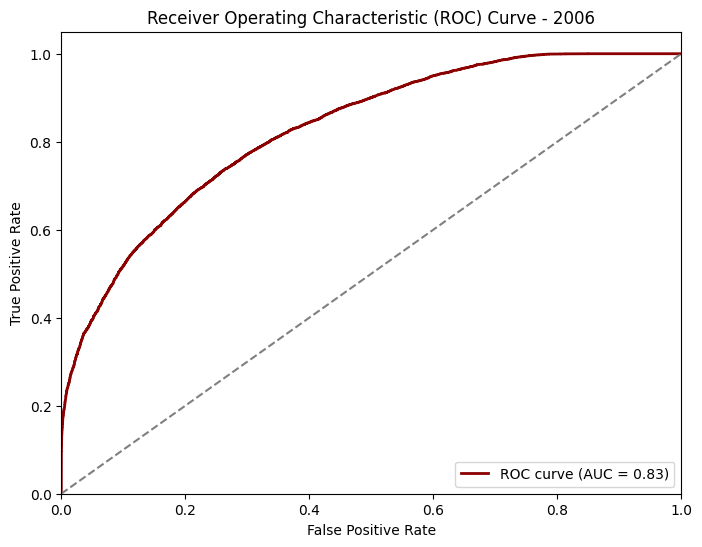

In [222]:
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - 2006')
plt.legend(loc='lower right')
plt.show()

In [118]:
# Visualising the importance coefficients for the features of the 'Diverted' column

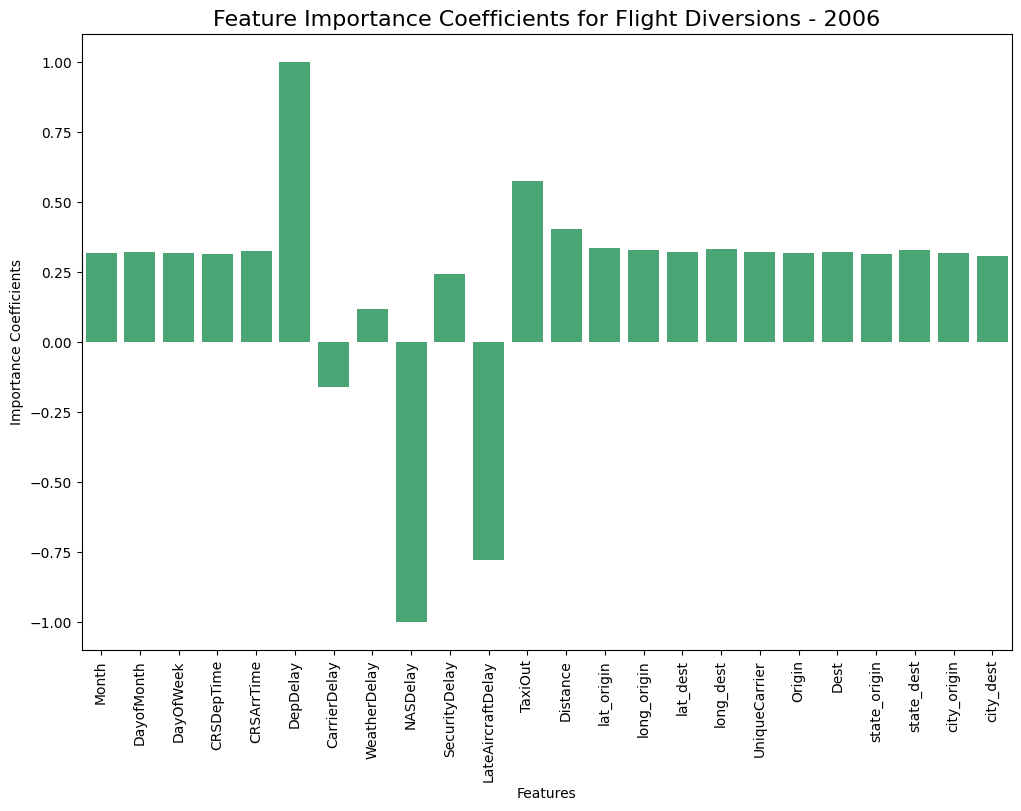

In [242]:
feature_importance = lr_model2006.coef_[0]

# Normalizing feature importance coefficients to range from -1 to 1 using Min-Max scaling
min_importance = np.min(feature_importance)
max_importance = np.max(feature_importance)
normalized_importance = (feature_importance - min_importance) / (max_importance - min_importance) * 2 - 1

# Creating a DataFrame to store feature names and their importance coefficients
feature_importance_df = pd.DataFrame({'Feature': X1_2006.columns, 'Importance': normalized_importance})

# Plotting the feature importance coefficients in a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(y='Importance', x='Feature', data=feature_importance_df, color='mediumseagreen')
plt.title('Feature Importance Coefficients for Flight Diversions - 2006', fontsize=16)
plt.ylabel('Importance Coefficients')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

## 2007 ##

In [120]:
df_2007 = cleaned[cleaned['Year'] == 2007]
df_2007

,Diverted,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TaxiOut,Origin,Dest,Distance,UniqueCarrier
7141922,0,2007,1,1,1,1225,1340,7.0,0,0,0,0,0,11,SMF,ONT,389,WN
7141923,0,2007,1,1,1,1905,2035,13.0,0,0,0,0,0,6,SMF,PDX,479,WN
7141924,0,2007,1,1,1,2130,2300,36.0,3,0,0,0,31,9,SMF,PDX,479,WN
7141925,0,2007,1,1,1,1200,1330,30.0,23,0,0,0,3,8,SMF,PDX,479,WN
7141926,0,2007,1,1,1,830,1000,1.0,0,0,0,0,0,9,SMF,PDX,479,WN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595132,0,2007,12,15,6,1605,1736,-7.0,0,0,0,0,0,17,MCO,ATL,403,DL
14595133,0,2007,12,15,6,1851,2105,11.0,0,0,0,0,0,21,ATL,SLC,1589,DL
14595134,0,2007,12,15,6,1025,1735,-1.0,0,0,15,0,0,19,LAX,ATL,1946,DL
14595135,0,2007,12,15,6,1315,1622,38.0,0,0,0,0,36,14,DFW,ATL,732,DL


In [121]:
# Merging the "iata" column from airports with "Origin" in df_2007
data_origin2007 = pd.merge(df_2007, airports, left_on='Origin', right_on='iata', how= 'left', suffixes=('_origin','_dest'))

In [122]:
# Merging the "iata" column from airports with "Dest" in df_2007
data_dest2007 = pd.merge(data_origin2007, airports, left_on='Dest', right_on='iata', how= 'left', suffixes=('_origin','_dest'))

In [123]:
dataframe_2 = pd.merge(data_dest2007, carriers, left_on='UniqueCarrier', right_on='Code', how= 'left')

#Renaming "UniqueCarrier" column with "Code" from carriers
dataframe_2.rename(columns = {'Code': 'UniqueCarrier_Code'}, inplace=True)

In [124]:
print(dataframe_2.columns)

Index(['Diverted', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime',
       'CRSArrTime', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'TaxiOut', 'Origin', 'Dest',
       'Distance', 'UniqueCarrier', 'iata_origin', 'airport_origin',
       'city_origin', 'state_origin', 'country_origin', 'lat_origin',
       'long_origin', 'iata_dest', 'airport_dest', 'city_dest', 'state_dest',
       'country_dest', 'lat_dest', 'long_dest', 'UniqueCarrier_Code',
       'Description'],
      dtype='object')


In [125]:
dataframe_2.drop(columns= ['Description'], inplace=True)

In [126]:
dataframe_2

,Diverted,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,...,lat_origin,long_origin,iata_dest,airport_dest,city_dest,state_dest,country_dest,lat_dest,long_dest,UniqueCarrier_Code
0,0,2007,1,1,1,1225,1340,7.0,0,0,...,38.695422,-121.590767,ONT,Ontario International,Ontario,CA,USA,34.056000,-117.601194,WN
1,0,2007,1,1,1,1905,2035,13.0,0,0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
2,0,2007,1,1,1,2130,2300,36.0,3,0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
3,0,2007,1,1,1,1200,1330,30.0,23,0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
4,0,2007,1,1,1,830,1000,1.0,0,0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,0,2007,12,15,6,1605,1736,-7.0,0,0,...,28.428889,-81.316028,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,DL
7453211,0,2007,12,15,6,1851,2105,11.0,0,0,...,33.640444,-84.426944,SLC,Salt Lake City Intl,Salt Lake City,UT,USA,40.788388,-111.977773,DL
7453212,0,2007,12,15,6,1025,1735,-1.0,0,0,...,33.942536,-118.408074,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,DL
7453213,0,2007,12,15,6,1315,1622,38.0,0,0,...,32.895951,-97.037200,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,DL


In [127]:
# Checking the number of null values in 'DepDelay'

null_values = dataframe_2['DepDelay'].isnull().sum()
print("Number of null values in column '{}': {}".format('DepDelay', null_values))

Number of null values in column 'DepDelay': 160748


In [128]:
#Removing null values from 'DepDelay'
dataframe_2 = dataframe_2.dropna(subset=['DepDelay'])
dataframe_2

,Diverted,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,...,lat_origin,long_origin,iata_dest,airport_dest,city_dest,state_dest,country_dest,lat_dest,long_dest,UniqueCarrier_Code
0,0,2007,1,1,1,1225,1340,7.0,0,0,...,38.695422,-121.590767,ONT,Ontario International,Ontario,CA,USA,34.056000,-117.601194,WN
1,0,2007,1,1,1,1905,2035,13.0,0,0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
2,0,2007,1,1,1,2130,2300,36.0,3,0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
3,0,2007,1,1,1,1200,1330,30.0,23,0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
4,0,2007,1,1,1,830,1000,1.0,0,0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,0,2007,12,15,6,1605,1736,-7.0,0,0,...,28.428889,-81.316028,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,DL
7453211,0,2007,12,15,6,1851,2105,11.0,0,0,...,33.640444,-84.426944,SLC,Salt Lake City Intl,Salt Lake City,UT,USA,40.788388,-111.977773,DL
7453212,0,2007,12,15,6,1025,1735,-1.0,0,0,...,33.942536,-118.408074,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,DL
7453213,0,2007,12,15,6,1315,1622,38.0,0,0,...,32.895951,-97.037200,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,DL


In [129]:
#Replacing null values in 'TaxiOut' with their mean
dataframe_2 = dataframe_2.copy()
dataframe_2['TaxiOut'].fillna(dataframe_2['TaxiOut'].mean(), inplace=True)

In [130]:
# Checking the number of 0s and 1s in 'Diverted'
dataframe_2.Diverted.value_counts()

Diverted
0    7275288
1      17179
Name: count, dtype: int64

In [131]:
# Check for null values in the 'Diverted' column
null_values = dataframe_2['Diverted'].isnull().sum()

In [132]:
# Print the number of null values
print("Number of null values in the 'Diverted' column:", null_values)

Number of null values in the 'Diverted' column: 0


In [133]:
# Turning 'DepDelay' values to integers
dataframe_2['DepDelay'] = dataframe_2['DepDelay'].astype(int)

In [134]:
# Dropping all remaining null values in dataframe_2
dataframe_2 = dataframe_2.dropna(axis=0)

In [135]:
pd.isnull(dataframe_2).sum(axis=0)

Diverted              0
Year                  0
Month                 0
DayofMonth            0
DayOfWeek             0
CRSDepTime            0
CRSArrTime            0
DepDelay              0
CarrierDelay          0
WeatherDelay          0
NASDelay              0
SecurityDelay         0
LateAircraftDelay     0
TaxiOut               0
Origin                0
Dest                  0
Distance              0
UniqueCarrier         0
iata_origin           0
airport_origin        0
city_origin           0
state_origin          0
country_origin        0
lat_origin            0
long_origin           0
iata_dest             0
airport_dest          0
city_dest             0
state_dest            0
country_dest          0
lat_dest              0
long_dest             0
UniqueCarrier_Code    0
dtype: int64

In [136]:
dataframe_2

,Diverted,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,...,lat_origin,long_origin,iata_dest,airport_dest,city_dest,state_dest,country_dest,lat_dest,long_dest,UniqueCarrier_Code
0,0,2007,1,1,1,1225,1340,7,0,0,...,38.695422,-121.590767,ONT,Ontario International,Ontario,CA,USA,34.056000,-117.601194,WN
1,0,2007,1,1,1,1905,2035,13,0,0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
2,0,2007,1,1,1,2130,2300,36,3,0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
3,0,2007,1,1,1,1200,1330,30,23,0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
4,0,2007,1,1,1,830,1000,1,0,0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,0,2007,12,15,6,1605,1736,-7,0,0,...,28.428889,-81.316028,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,DL
7453211,0,2007,12,15,6,1851,2105,11,0,0,...,33.640444,-84.426944,SLC,Salt Lake City Intl,Salt Lake City,UT,USA,40.788388,-111.977773,DL
7453212,0,2007,12,15,6,1025,1735,-1,0,0,...,33.942536,-118.408074,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,DL
7453213,0,2007,12,15,6,1315,1622,38,0,0,...,32.895951,-97.037200,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,DL


In [137]:
dataframe_2.to_csv('dataframe_2.csv', index=False)

In [138]:
# Splitting the dataset into features (X_2007) and target variable (y_2007)

X_2007 = dataframe_2.drop(['Diverted'], axis=1)
y_2007 = dataframe_2['Diverted']

In [139]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split
X_2007_train, X_2007_test, y_2007_train, y_2007_test = train_test_split(X_2007, y_2007, test_size=0.2, random_state=42)

In [140]:
# Viewing the shape of x_train and x_test
X_2007_train.shape, X_2007_test.shape

((5825526, 32), (1456382, 32))

In [141]:
#Checking training set to see whether the 'Diverted' column has balanced data in terms of number of 0s and 1s.
y_2007_train.value_counts()

Diverted
0    5811903
1      13623
Name: count, dtype: int64

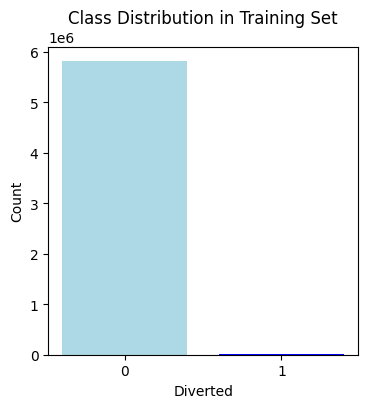

In [142]:
# Using a bar plot to visualise the imbalance of the training set
class_counts = y_2007_train.value_counts()

plt.figure(figsize=(4,4))
plt.bar(class_counts.index, class_counts.values, color=['lightblue', 'blue'])
plt.xlabel('Diverted')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')
plt.xticks(class_counts.index, ['0', '1'])  
plt.show()

In [143]:
train_set = pd.concat([X_2007_train, y_2007_train], axis=1)

In [144]:
# Dividing the dataset into majority and minority classes to perform class balancing
data_majority_2007 = train_set[train_set['Diverted'] == 0]
data_minority_2007 = train_set[train_set['Diverted'] == 1]

In [145]:
# Downsampling the majority class
from sklearn.utils import resample
data_majority2007_downsampled = resample(data_majority_2007,
                                         replace = False,  # sampling without replacement
                                         n_samples=int(5811903 * 0.01),   # to match minority class
                                         random_state=0)

In [146]:
# Upsampling the minority class
data_minority2007_upsampled = resample(data_minority_2007, 
                                 replace=True,     # sampling with replacement
                                 n_samples=int(13623 * 20),    # to match majority class
                                 random_state=0)

In [147]:
# Combining the sampled majority and minority classes to create a balanced dataset
train_set2007 = pd.concat([data_majority2007_downsampled, data_minority2007_upsampled])

In [148]:
# Displaying new class count in the training set
train_set2007.Diverted.value_counts()

Diverted
1    272460
0     58119
Name: count, dtype: int64

In [149]:
train_set2007

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,NASDelay,...,long_origin,iata_dest,airport_dest,city_dest,state_dest,country_dest,lat_dest,long_dest,UniqueCarrier_Code,Diverted
4781955,2007,8,23,4,620,750,320,311,0,0,...,-93.386858,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,MQ,0
133415,2007,1,6,6,1225,1324,2,22,0,0,...,-104.667002,ASE,Aspen-Pitkin Co/Sardy,Aspen,CO,USA,39.223160,-106.868845,YV,0
1370035,2007,3,1,4,1700,1836,27,27,0,0,...,-111.977773,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,OO,0
6625773,2007,11,10,6,725,1100,-6,0,0,0,...,-97.037200,PIT,Pittsburgh International,Pittsburgh,PA,USA,40.491466,-80.232871,MQ,0
623369,2007,2,1,4,1915,2030,5,0,0,0,...,-121.590767,ONT,Ontario International,Ontario,CA,USA,34.056000,-117.601194,WN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971937,2007,5,13,7,1600,1741,10,0,0,0,...,-93.216922,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,AA,1
4602340,2007,8,9,4,1540,1900,-10,0,0,0,...,-121.590767,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,UA,1
5587186,2007,9,4,2,1600,1848,-8,0,0,0,...,-122.597500,SLC,Salt Lake City Intl,Salt Lake City,UT,USA,40.788388,-111.977773,DL,1
3075554,2007,6,2,6,1620,1915,10,0,0,0,...,-75.241141,PBI,Palm Beach International,West Palm Beach,FL,USA,26.683162,-80.095594,WN,1


In [150]:
train_set2007.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'TaxiOut', 'Origin', 'Dest', 'Distance',
       'UniqueCarrier', 'iata_origin', 'airport_origin', 'city_origin',
       'state_origin', 'country_origin', 'lat_origin', 'long_origin',
       'iata_dest', 'airport_dest', 'city_dest', 'state_dest', 'country_dest',
       'lat_dest', 'long_dest', 'UniqueCarrier_Code', 'Diverted'],
      dtype='object')

In [151]:
#Defining the categorical columns 
cat_cols = ['UniqueCarrier','Origin','Dest','state_origin','state_dest','city_origin','city_dest']

In [152]:
# Encoding the categorical variables into integer labels
label_encoder = LabelEncoder()
for col in cat_cols:
    train_set2007[col] = label_encoder.fit_transform(train_set2007[col])

In [153]:
#Selecting the categorical columns from the dataset
df2007_cat = train_set2007[cat_cols]

In [154]:
df2007_cat.dtypes

UniqueCarrier    int32
Origin           int32
Dest             int32
state_origin     int32
state_dest       int32
city_origin      int32
city_dest        int32
dtype: object

In [155]:
#Selecting the required numerical columns 
num_cols = ['Diverted','Month','DayofMonth','DayOfWeek','CRSDepTime', 'CRSArrTime','DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 
            'SecurityDelay','LateAircraftDelay','TaxiOut', 'Distance','lat_origin', 'long_origin','lat_dest', 'long_dest']

In [156]:
df2007_num = pd.DataFrame(train_set2007, columns=num_cols)


In [157]:
#Resetting indices of both DataFrames
df2007_num.reset_index(drop=True, inplace=True)
df2007_cat.reset_index(drop=True, inplace=True)

In [158]:
# Combining the encoded categorical variables and numerical variables to create a new encoded dataframe 
df2007_new = pd.concat([df2007_num, df2007_cat], axis=1)

In [159]:
df2007_new

,Diverted,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,CarrierDelay,WeatherDelay,NASDelay,...,long_origin,lat_dest,long_dest,UniqueCarrier,Origin,Dest,state_origin,state_dest,city_origin,city_dest
0,0,8,23,4,620,750,320,311,0,0,...,-93.386858,41.979595,-87.904464,11,248,209,23,13,249,53
1,0,1,6,6,1225,1324,2,22,0,0,...,-104.667002,39.223160,-106.868845,19,78,17,5,5,71,13
2,0,3,1,4,1700,1836,27,27,0,0,...,-111.977773,33.434167,-112.008056,14,255,218,44,3,229,213
3,0,11,10,6,725,1100,-6,0,0,0,...,-97.037200,40.491466,-80.232871,11,79,222,43,37,67,216
4,0,2,1,4,1915,2030,5,0,0,0,...,-121.590767,34.056000,-117.601194,17,257,208,4,4,226,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330574,1,5,13,7,1600,1741,10,0,0,0,...,-93.216922,32.895951,-97.037200,1,191,82,22,43,171,68
330575,1,8,9,4,1540,1900,-10,0,0,0,...,-121.590767,39.858408,-104.667002,15,257,81,4,5,226,72
330576,1,9,4,2,1600,1848,-8,0,0,0,...,-122.597500,40.788388,-111.977773,6,208,263,36,44,213,236
330577,1,6,2,6,1620,1915,10,0,0,0,...,-75.241141,26.683162,-80.095594,17,211,213,37,8,207,277


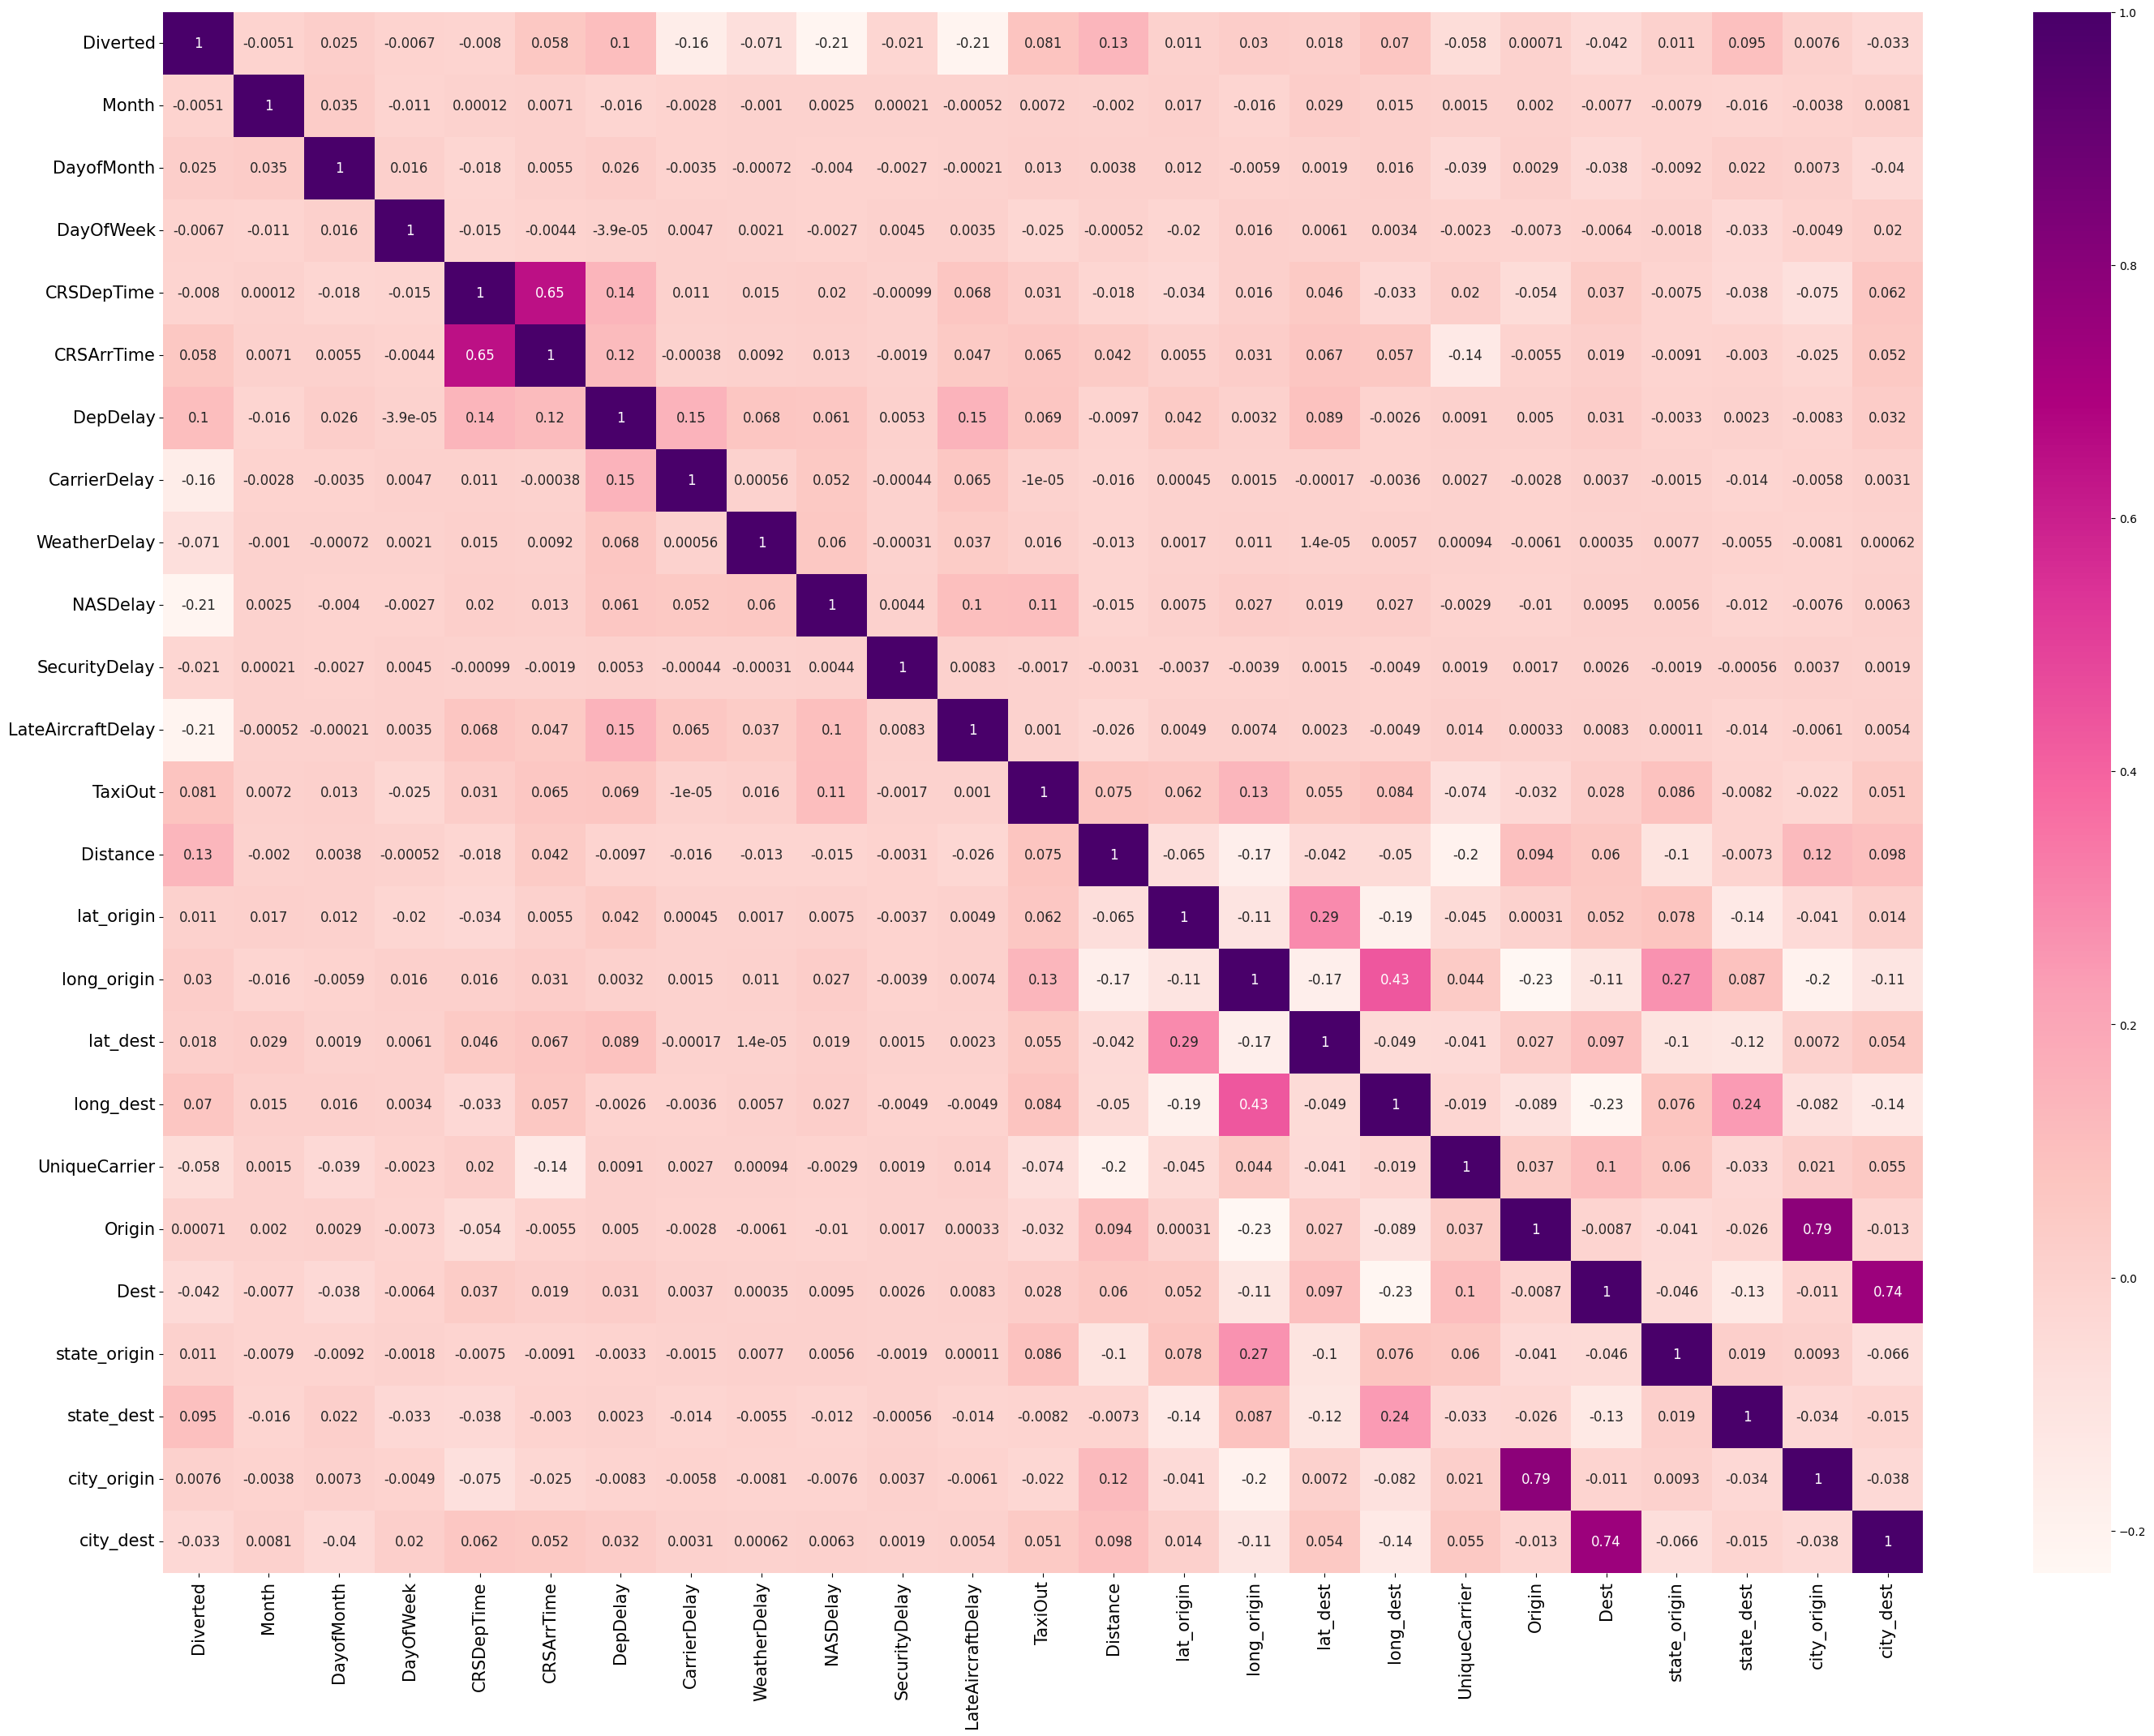

In [160]:
# Creating a heatmap to visualise the correlation/relationship between the columns in 2007

corr = df2007_new.corr()
plt.figure(figsize=(35,25))
heatmap = sns.heatmap(corr, cmap="RdPu", annot=True, annot_kws={"fontsize": 12})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15,rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)
plt.show()

In [161]:
train_set2007.Diverted.value_counts()

Diverted
1    272460
0     58119
Name: count, dtype: int64

In [162]:
# Checking the number of 0s and 1s in the 'Diverted' column of the new encoded dataset
df2007_new.Diverted.value_counts()

Diverted
1    272460
0     58119
Name: count, dtype: int64

In [163]:
#Making the new x_train and y_train

X1_2007 = df2007_new.drop(['Diverted'],axis=1)
y1_2007 = df2007_new['Diverted']

In [164]:
# Splitting into new train and test data
X1_2007_train, X1_2007_test, y1_2007_train, y1_2007_test = train_test_split(X1_2007, y1_2007, test_size=0.2, random_state=42)

In [165]:
# Fitting and transforming the standard scaler on the encoded training data
std_scaler = MinMaxScaler()
X_train_scaled2007 = std_scaler.fit_transform(X1_2007_train)

In [167]:
# Fitting the standard scaler on the encoded testing data
std_scaler = MinMaxScaler()  
X_test_scaled2007 = std_scaler.transform(X1_2007_test)

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
# Creating a LogisticRegression model
lr_model2007 = LogisticRegression()

In [170]:
# Fitting the logistic regression model to the training data
lr_model2007.fit(X_train_scaled2007, y1_2007_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
# Predicting labels for the test data using the model
y_pred2007 = lr_model2007.predict(X_test_scaled2007)

In [172]:
# Calculating the accuracy of the model on the test data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y1_2007_test, y_pred2007)
print("Accuracy:", accuracy)

Accuracy: 0.861183374674814


In [173]:
# Predicting probabilities on the standardized test data
y_pred_prob_lr2007 = lr_model2007.predict_proba(X_test_scaled2007)[:, 1]

In [174]:
# Calculating false positive rate (fpr), true positive rate (tpr), and thresholds

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y1_2007_test, y_pred_prob_lr2007)


In [175]:
from sklearn.metrics import f1_score

In [176]:
# Calculating the F1 score
threshold = 0.5
y_pred_lr_thresholded = (y_pred_prob_lr2007 >= threshold).astype(int)

f1 = f1_score(y1_2007_test, y_pred_lr_thresholded)
print("F1 Score:", f1)

F1 Score: 0.9220604969513748


In [177]:
# Calculating the area under the ROC curve
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8266701064543611


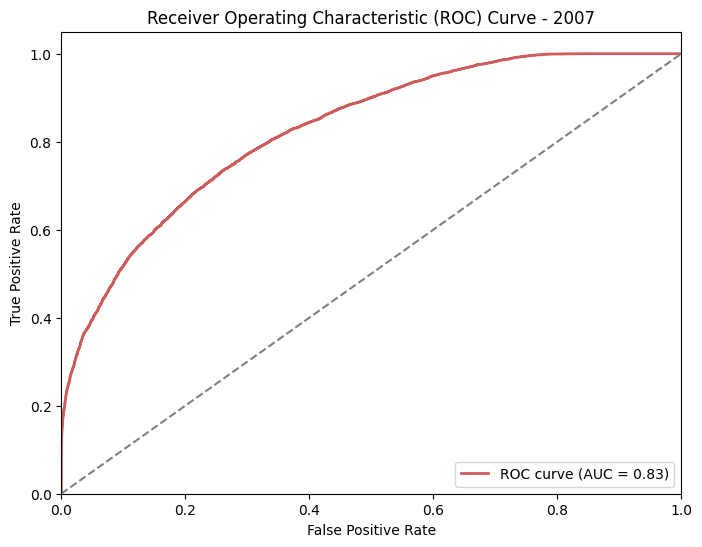

In [231]:
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='indianred', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - 2007')
plt.legend(loc='lower right')
plt.show()

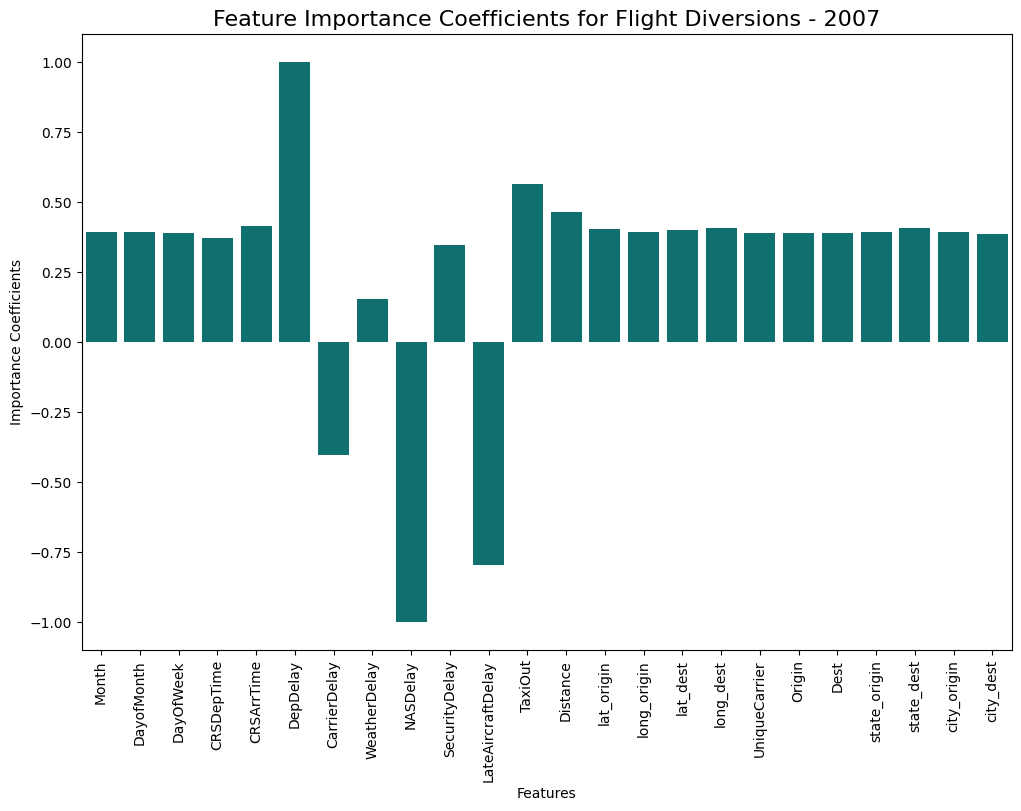

In [244]:
feature_importance = lr_model2007.coef_[0]

# Normalizing feature importance coefficients to range from -1 to 1 using Min-Max scaling
min_importance = np.min(feature_importance)
max_importance = np.max(feature_importance)
normalized_importance = (feature_importance - min_importance) / (max_importance - min_importance) * 2 - 1

# Creating a DataFrame to store feature names and their importance coefficients
feature_importance_df = pd.DataFrame({'Feature': X1_2007.columns, 'Importance': normalized_importance})

# Plotting the feature importance coefficients in a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(y='Importance', x='Feature', data=feature_importance_df, color='teal')
plt.title('Feature Importance Coefficients for Flight Diversions - 2007', fontsize=16)
plt.ylabel('Importance Coefficients')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()